In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

### Data setup

In [182]:
dataset_raw = pd.read_csv('/Users/yeqinghua/Downloads/house_prices/train.csv')
dataset_raw.sample(n=6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1099,1100,20,RL,82.0,11880,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,COD,Abnorml,157000
476,477,20,RL,75.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,208900
1254,1255,60,RL,60.0,6931,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,165400
952,953,85,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,133900
300,301,190,RL,90.0,15750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,157000
1133,1134,60,RL,80.0,9828,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,239500


In [183]:
dataset = dataset_raw[['SalePrice', 'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'LotShape', 'SaleCondition']]

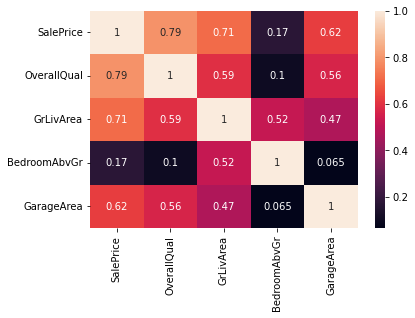

In [184]:
import seaborn as sns
_ = sns.heatmap(dataset.corr(), annot=True)

In [185]:
y = dataset['SalePrice']
X_raw = dataset.drop('SalePrice', axis=1)
X_raw.head(5)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition
0,7,1710,3,548,Reg,Normal
1,6,1262,3,460,Reg,Normal
2,7,1786,3,608,IR1,Normal
3,7,1717,3,642,IR1,Abnorml
4,8,2198,4,836,IR1,Normal


### Data encoding

In [186]:
from sklearn.preprocessing import OrdinalEncoder

X_ord_encoded = X_raw.copy()
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_ord_encoded[['SaleCondition']])
X_ord_encoded['SaleCondition'] = ordinal_encoder.transform(X_ord_encoded[['SaleCondition']])
X_ord_encoded.head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition
0,7,1710,3,548,Reg,4.0
1,6,1262,3,460,Reg,4.0
2,7,1786,3,608,IR1,4.0
3,7,1717,3,642,IR1,0.0
4,8,2198,4,836,IR1,4.0
5,5,1362,1,480,IR1,4.0


In [187]:
X = pd.get_dummies(X_ord_encoded, columns=['LotShape'], prefix=['is'])
X.head()

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,SaleCondition,is_IR1,is_IR2,is_IR3,is_Reg
0,7,1710,3,548,4.0,0,0,0,1
1,6,1262,3,460,4.0,0,0,0,1
2,7,1786,3,608,4.0,1,0,0,0
3,7,1717,3,642,0.0,1,0,0,0
4,8,2198,4,836,4.0,1,0,0,0


### Scaling

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7)

In [189]:
features_to_scale = [ 'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea']
X_train[features_to_scale].head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea
1304,7,1708,3,380
1281,7,1339,2,484
1388,9,1746,3,758
106,4,1047,2,273
221,6,2267,4,390
1346,7,2156,3,508


In [198]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train.loc[:,features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test.loc[:,features_to_scale] = scaler.transform(X_test[features_to_scale])
X_train.head(6)

/Users/yeqinghua/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/Users/yeqinghua/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,SaleCondition,is_IR1,is_IR2,is_IR3,is_Reg
1304,0.633427,0.382507,0.130616,-0.404557,4.0,0,0,0,1
1281,0.633427,-0.296776,-1.113080,0.089621,4.0,1,0,0,0
1388,2.070946,0.452460,0.130616,1.391589,4.0,1,0,0,0
106,-1.522851,-0.834311,-1.113080,-0.912990,4.0,0,0,0,1
221,-0.085332,1.411556,1.374312,-0.357040,4.0,1,0,0,0
1346,0.633427,1.207218,0.130616,0.203662,4.0,0,1,0,0


### Model training

In [192]:
X1 = dataset_raw['GrLivArea'].values.reshape(-1, 1)
y = dataset_raw['SalePrice'].values.reshape(-1, 1)

In [193]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = .7)

In [194]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X1_train, y_train)

LinearRegression()

In [195]:
print('Coefficient: ', regr.coef_[0][0])
print('Intercept: ', regr.intercept_[0])

Coefficient:  121.05525086698934
Intercept:  2025.0367307962733


### Model evaluation

In [196]:
y_pred = regr.predict(X1_test)

In [197]:
from sklearn.metrics import mean_squared_log_error

def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)
compute_rmsle(y_test, y_pred)

0.28